# Plan :
#### I - Quelles apps utilisent des trackers de la catégorie "Location" ?
#### II - Quels sont les trackers de localisation les plus utilisés ?
#### III - L'indice de Herfindahl Hirschmann
#### IV - Occurence des trackers de localisation par date de création

# I - Quelles apps utilisent des trackers de la catégorie "Location" ?
Nous allons ici sélectionner les applications qui utilisent des trackers de la catégorie "Location"

In [13]:
import pandas as pd
from tqdm import tqdm

In [14]:
trackers = pd.read_csv(
    "./Data/Trackers_location.csv", quotechar='"', skipinitialspace=True, low_memory=False)

In [23]:
applications = pd.read_csv(
    "./Data/EP_Data_Extended.csv", quotechar='"', skipinitialspace=True, low_memory=False)

In [16]:
trackers_id = trackers["id"].tolist() #on met le numéro des trackers de localisation dans une liste
#print('trackers_id = ', trackers_id)

trackers_id =  [17, 28, 37, 44, 57, 77, 102, 144, 174, 181, 192, 208, 209, 210, 212, 245, 279, 280, 281, 283, 284, 285, 289, 291, 298, 307, 310, 313, 315, 320, 323, 327, 333, 341, 345, 351, 352, 353, 354, 357, 358, 361, 387, 388, 389, 394, 396, 397, 398, 401, 402, 404, 405, 406, 408, 414]


In [18]:
applications_filtered = {'DataSetId': [],
                         'app_name': [],
                         'handle': [],
                         'creator': [],
                         'trackers': []} #dictionnaire des applications qui contiennent trackers de loc
#print('trackers_id = ', applications_filtered)

trackers_id =  {'DataSetId': [], 'app_name': [], 'handle': [], 'creator': [], 'trackers': []}


In [19]:
for app in tqdm(range(applications.shape[0])):
    trackers_app = str(applications.iloc[app]['trackers']).split(',') #récupérer les numeros des trackers contenus dans les app
    trackers_app = [nbr for nbr in trackers_app if nbr!='nan']
    try:
        trackers_app = [int(nbr) for nbr in trackers_app] #si l'app contient un des numéro de notre liste
    except:
        pass
    already_added=False
    for tracker in trackers_app:
        if (tracker in trackers_id) and (already_added==False):
            applications_filtered['DataSetId'].append(applications.iloc[app]['DataSetId']) #on récupère toutes les infos de l'app dans notre dictionnaire
            applications_filtered['app_name'].append(applications.iloc[app]['app_name'])
            applications_filtered['handle'].append(applications.iloc[app]['handle'])
            applications_filtered['creator'].append(applications.iloc[app]['creator'])
            applications_filtered['trackers'].append(applications.iloc[app]['trackers'])
            already_added=True

100%|██████████| 195307/195307 [01:23<00:00, 2342.18it/s]


In [20]:
applications_filtered = pd.DataFrame(data=applications_filtered)
    

In [21]:
applications_filtered

,DataSetId,app_name,handle,creator,trackers
0,100571,PayByPhone,com.paybyphone,PayByPhone Technologies Inc.,"26,12,17,27,48,105,219,85,55,312,49"
1,188423,Viber Messenger,com.viber.voip,Viber Media S.à r.l.,"17,27,48,52,105,135,312,49,118,382"
2,70688,Météo-France,fr.meteo,Météo-France,"25,27,35,37,31,88,48,65,7,92,89,105,106,121,72..."
3,160317,Marmiton : Recettes gourmandes,com.aufeminin.marmiton.activities,aufeminin.com,"36,12,23,40,1,25,27,35,48,56,66,61,65,67,70,7,..."
4,149436,"Groupon - Shop Deals, Discounts & Coupons",com.groupon,"Groupon, Inc.","27,66,67,70,127,181,312"
...,...,...,...,...,...
14425,101320,Paxful,com.paxful.wallet,NaN,"17,62,125,291,207,49,118,344"
14426,69537,Luno,co.bitx.android.wallet,NaN,"27,28,66,67,70,48,18,105,251,49"
14427,86888,HBO Max,com.hbo.hbonow,NaN,"17,312,49"
14428,170623,My Data Manager,com.mobidia.android.mdm,NaN,"28,12,27,66,67,69,70,49"


In [22]:
applications_filtered.to_csv(r'/Users/emmabourdit/Desktop/app_trackers/Work/Data/App_using_loc_trackers.csv', index = False)
#on converti applications_filtered dans un csv

# II - Quels sont les trackers de localisation les plus utilisés ?

In [24]:
trackers_appli = applications_filtered.loc[:, "trackers"] #on prend les numeros des trackers dans chaque app de applications_filtered

In [25]:
trackers_appli = trackers_appli.values.tolist() #on met dans une liste

In [26]:
trackers_appli

['26,12,17,27,48,105,219,85,55,312,49',
 '17,27,48,52,105,135,312,49,118,382',
 '25,27,35,37,31,88,48,65,7,92,89,105,106,121,72,90,312,49,34,107',
 '36,12,23,40,1,25,27,35,48,56,66,61,65,67,70,7,92,89,83,121,105,106,210,236,263,302,72,312,49,90,34,107,375',
 '27,66,67,70,127,181,312',
 '12,31,17,25,48,66,65,67,70,106,312,49',
 '17,3,25,35,48,66,18,65,67,70,105,106,127,312,49',
 '25,27,29,28,12,66,67,70,65,106,167,312,91',
 '40,27,31,66,67,70,148,401,266,224,312,11',
 '37,25,27,35,48,66,88,65,67,69,70,7,92,89,121,105,106,213,224,72,312,90,34,107',
 '15,25,27,38,35,48,53,56,66,61,65,67,70,52,92,121,105,106,289,145,196,265,72,218,312,90,259,169,107',
 '17,38,66,67,70,207,312,49',
 '17,25,27,35,48,66,61,65,67,52,7,89,121,105,106,72,312,90,169,107,325',
 '26,12,17,27,48,105,219,85,55,312,49',
 '17,25,27,35,66,67,70,65,61,159,52,92,106,167,218,312,49,169,107,382,146',
 '25,27,65,61,106,283,312,49,118',
 '17,40,27,56,66,67,69,70,250,43,312,49',
 '17,40,27,66,67,70,56,312',
 '17,40,27,56,66,67

In [27]:
most_used_trackers= pd.DataFrame(trackers_id) #on fait un df de trackers_id qui contient les numero des trackers loc
#print(most_used_trackers) #il y a 56 trackers de lcoalisation

In [28]:
list_trackers_use = []  #nbre d'apps qui utilisent chaque tracker de loc
for j in range (0,56): #on parcours la liste des numero de trackers
    tr=str(trackers_id[j]) #on caste trackers_id[j] en string
    sum=0
    for i in range(len(trackers_appli)) : #on parcours toutes les appli voir cb utilisent trackers_id[j]
        sum = sum + trackers_appli[i].count(tr) #count c nbre d'elts dans une liste, ici 1 pour tr. Dès que notre chiffre apparait on fait +1 sur sum
    list_trackers_use.append(sum) #append ajoute un elt a une liste. Ajoute le nbr dapp qui utilisent le tracker a la liste
#print(trackers_appli)
#print(list_trackers_use)

In [29]:
trackers['Occurrence'] = list_trackers_use #ajoute une colonne occurence au .csv des trackers de loc

In [30]:
trackers = trackers[['id','name','categories','Occurrence','code_signature','creation_date','network_signature','website']]

In [31]:
trackers=trackers.sort_values('Occurrence', ascending=False) #trie du tracker de loc le plus utilisé au moins utilisé

In [32]:
trackers

,id,name,categories,Occurrence,code_signature,creation_date,network_signature,website
0,17,Braze (formerly Appboy),"['Analytics', 'Advertisement', 'Location']",6412,com.appboy,2017-09-24,appboy\.com,https://www.braze.com
1,28,LeanPlum,"['Analytics', 'Profiling', 'Location']",3835,com.leanplum.,2017-09-24,leanplum\.com,https://www.leanplum.com/
32,333,Huawei Mobile Services (HMS) Core,"['Analytics', 'Advertisement', 'Location']",3567,com.huawei.hms.analytics|com.huawei.hms.locati...,2020-11-25,NaN,https://developer.huawei.com/consumer/en/hms
8,174,CleverTap,"['Analytics', 'Profiling', 'Location']",1025,com.clevertap.,2019-03-10,wzrkt\.com,https://clevertap.com/
29,320,Verizon Ads,"['Analytics', 'Profiling', 'Identification', '...",878,com.verizon.ads|com.verizondigitalmedia.mobile...,2020-09-19,NaN,https://www.verizonmedia.com/
41,361,AutoNavi / Amap,['Location'],694,com.amap.api,2021-02-28,grid\.amap\.com|tm\.amap\.com|mst[0-9]*\.is\.a...,https://mobile.amap.com/
4,57,Cuebiq,"['Analytics', 'Location']",670,com.cuebiq.cuebiqsdk.model.Collector|com.cuebi...,2017-12-03,cuebiq\.com,http://www.cuebiq.com/
3,44,OpenLocate,['Location'],626,com.safegraph.|com.openlocate,2017-11-16,api\.safegraph\.com,https://www.safegraph.com/
38,354,X-Mode,"['Analytics', 'Location']",573,io.xmode.BcnConfig|io.xmode.locationsdk|io.mysdk.,2021-01-24,api\.myendpoint\.io|bin5y4muil\.execute-api\.u...,https://xmode.io/
36,352,Opensignal,"['Analytics', 'Location']",416,com.opensignal.datacollection.,2021-01-24,NaN,https://www.opensignal.com


# Histogrammes des trackers "Location" les plus utilisés

In [44]:
import plotly.express as px #conda install -c plotly plotly_express
import plotly.graph_objects as pxo
import matplotlib.pyplot as plt #conda install -c conda-forge matplotlib

In [45]:
most_used=trackers.head(15)

In [50]:
most_used['id']=most_used['id'].astype(str)
most_used["id"].astype("category")
trackers['id']=trackers['id'].astype(str)
trackers["id"].astype("category")

px.histogram(trackers, 
             x="id", 
             y="Occurrence", 
             color="id", 
             title="Histogramme montrant l'occurence des trackers de localisation")

<ipython-input-50-15f7879301d5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



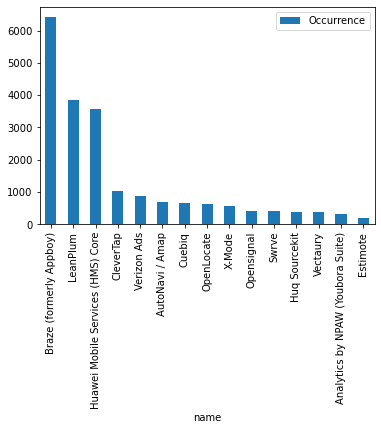

In [51]:
most_used.plot.bar(x="name", y="Occurrence")
#plt.savefig('Location_trackers_histogramme.png')

In [52]:
px.histogram(most_used, 
             x="id", 
             y="Occurrence", 
             color="id", 
             title="Histogramme montrant l'occurence des 15 trackers de localisation les plus utilisés")

In [53]:

###########################C'est pour les histogrammes dynamiques j'ai pas finis###########################

### on fait la liste des 15 trackers les plus utilisés dans le temps :
#trackers = trackers.reset_index()
#fifteen_trackers_more_used=[]*15
#for i in range (0, 15):
#    nb_tracker=trackers.id[i]
#    fifteen_trackers_more_used.append(nb_tracker)
#print(fifteen_trackers_more_used)

### on crée la fonction qui va calculer pour chaque date nbre d'app qui utilisent chaqe tracker de loc
#trackers_id c'est la liste avec les numéros des trackers de loc
#trackers_appli #c'est la liste par application les trackers contenus dans l'app

### on crée la fonction qui va nous crée notre dataframe pour chaque time
### application_filtered_time : pour chaque date on crée un nouveau dataframe avec toutes les applications utilisant un des trackers de localisation à telle date
#trackers_appli_time = applications_filtered.loc[:, "trackers"] #on prend les numero des trackers dans chaque app de applications_filtered_time
#trackers_appli = trackers_appli.values.tolist() #on met dans une liste

# III- Indice de Herfindahl Hirschmann

In [54]:
total_market=trackers["Occurrence"].sum()

In [55]:
trackers['Market_shares'] = trackers["Occurrence"]/total_market

In [56]:
squared_shares = trackers["Market_shares"]*100
squared_shares**=2

In [57]:
IHH_index=squared_shares.sum()

In [58]:
IHH_index

1432.7558704385688

IHH compris entre 1000 et 2000: zone intermédiaire, pouvant présenter des risques en présence de certains facteurs.

# III - Occurence des trackers de localisation par date de création

In [61]:
pxo.Figure(data=[pxo.Scatter( 
    x =most_used.id, 
    y =most_used.creation_date,
    mode = 'markers',) 
])

In [62]:
px.histogram(trackers, 
             x="id", 
             y="Occurrence", 
             color="id", 
             animation_frame="creation_date",
             range_x=[0,50],
             title="Histogramme distribution des trackers de loc")

In [63]:
trackers[["creation_date"]] = trackers[["creation_date"]].apply(pd.to_datetime)
fig = px.histogram(trackers, 
             x="creation_date", 
             y="Occurrence",
             #color="creation_date",
             #nbins="10",
             title="Histogramme montrant l'occurence des trackers de localisation selon leur date de création")
#fig.update_xaxes(type='category')
fig.show()